In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data.csv')
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.214190e+05,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000
mean,1.234644e+03,114.707311,42.358157,-71.088969,114.345028,42.357839,-71.087822,3020.227518,1984.443596,1.163426
std,1.853257e+04,91.828251,0.015366,0.024568,92.227295,0.122503,0.205472,902.348086,11.406707,0.521871
min,6.100000e+01,1.000000,42.167226,-71.166491,1.000000,0.000000,-71.166491,5.000000,1886.000000,0.000000
25%,3.650000e+02,51.000000,42.348810,-71.104412,49.000000,42.348953,-71.104412,2472.000000,1978.000000,1.000000
50%,5.910000e+02,87.000000,42.358100,-71.091156,84.000000,42.358100,-71.091156,3176.000000,1988.000000,1.000000
75%,9.790000e+02,177.000000,42.365994,-71.069849,177.000000,42.365908,-71.068922,3752.000000,1993.000000,1.000000
max,2.146146e+06,374.000000,42.406302,-70.905558,376.000000,42.406302,0.000000,4301.000000,2002.000000,2.000000


In [4]:
#No documentation of whether female = 1 or 2. Guess is 2. Will have to figure this out. 
#Are riders disproportionally male or female?
gender = df['gender']
female = 0
male = 0
none = 0
for value in gender:
    if value == 1:
        male += 1
    elif value == 2:
        female += 1
    else:
        none += 1
print(female)
print(male)
print(none)


28077
85108
8234


In [5]:
total_riders = female + male + none
perc_female = (female /total_riders)
perc_male = (male/total_riders)
perc_none = (none/total_riders)
print (perc_female)
print (perc_male)
print (perc_none)

0.23124058013984633
0.700944662696942
0.06781475716321168


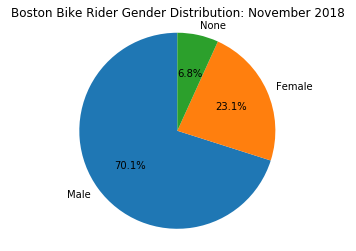

In [123]:
labels = 'Male', 'Female', 'None',
sizes = [perc_male, perc_female , perc_none]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Boston Bike Rider Gender Distribution: November 2018")

plt.show()

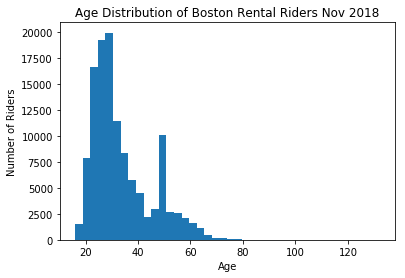

Maximum age is clearly an outlier: 132
Max age birth year: 1886
Minimum age: 16
Mean age: 33.55640385771584
Median age: 30.0


In [64]:
#What is the age distribution of bikers?
birth_year = df['birth year']
ages = 2018 - birth_year
plt.hist(ages, bins = 40)
plt.title('Age Distribution of Boston Rental Riders Nov 2018')
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.show()
print ("Maximum age is clearly an outlier: {}".format(max(ages)))
print ("Max age birth year: {}".format(min(birth_year)))
print ("Minimum age: {}".format(min(ages)))
print ("Mean age: {}".format(ages.mean()))
print ("Median age: {}".format(ages.median()))


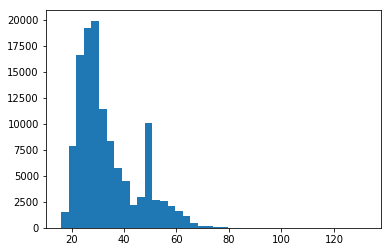

In [125]:
#Clearly there is an outlier. I don't believe someone from the 19th century is riding around Boston on a rental bike in 2018.
#Verified oldest person in America's birth year is 1905(113yrs old). Thank you Wikipedia.
#Let's get rid of outliers outside of 3 std to get rid of what is clearly a tech issue with 
#bike software/human registration error.

ages_lst = []
#np.mean above
for x in ages:
    if x <= (np.mean(ages) + 3 * np.std(ages)) or x >= (np.mean(ages) - 3 * np.std(ages)):
        ages_lst.append(x)
    
plt.hist(ages_lst, bins = 40)
plt.show()
#why are you not running. Timeout issue?

In [58]:
#Three standard deviations cuts off everyone older than 67. Let's be a bit more conservative
x1 = np.mean(ages) + 3*np.std(ages)
high_std = np.mean(ages) + 5*np.std(ages)
low_std = np.mean(ages) - 5*np.std(ages)

print (x1)
print (high_std)
print (low_std)


67.77638451864978
90.5897049592724
-23.47689724384071


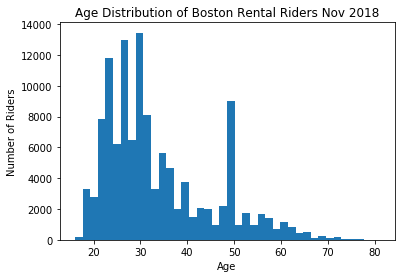

In [63]:
ages_adjusted = ages[ages < high_std]
#Ahhh, boolean indexing converts True/False to values
plt.hist(ages_adjusted, bins = 40)
plt.title('Age Distribution of Boston Rental Riders Nov 2018')
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.show()


In [65]:
#What is the adjusted mean/median age of riders? Same!
print (np.mean(ages_adjusted))
print (np.median(ages_adjusted))

33.532301912905936
30.0


In [ ]:
#What are the most popular stations and can we imply anything about socioeconomics based on station use?

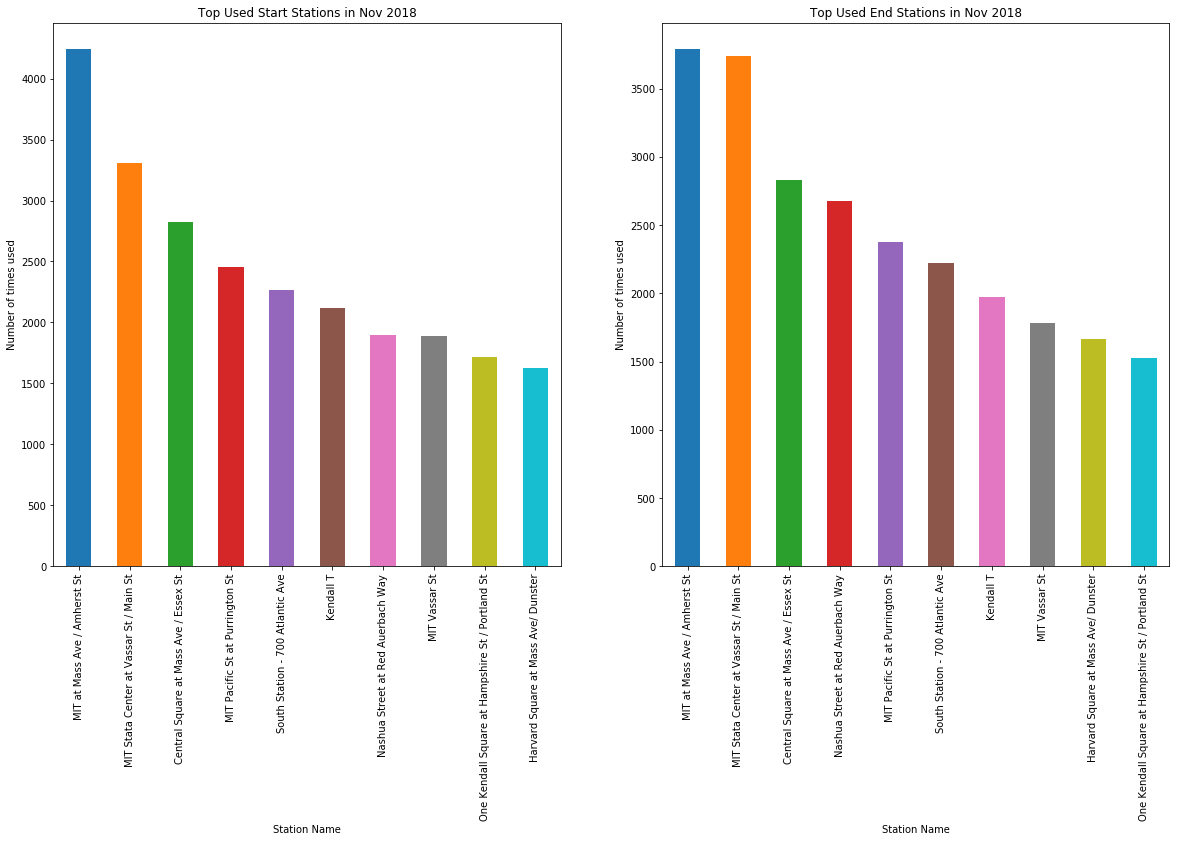

In [97]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.title('Top Used Start Stations in Nov 2018')
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
df['start station name'].value_counts().head(10).plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Top Used End Stations in Nov 2018')
plt.xlabel('Station Name')
plt.ylabel('Number of times used')
df['end station name'].value_counts().head(10).plot(kind='bar')

#These stops seem centered around colleges (MIT, BU, Harvard), so they probably see a lot of use by students, 
#particularly graduate students (ave age=33) or young professionals in the academic world.

In [113]:
df['start station latitude'] = df['start station latitude'].apply(pd.to_numeric, errors='coerce', downcast = np.float64)

ValueError: invalid downcasting method provided

In [108]:
type(df['start station latitude'])


pandas.core.series.Series

In [115]:
df['start station latitude']=df['start station latitude'].astype(float)

In [116]:
type(df['start station latitude'])

#omg why won't you turn into a float.

pandas.core.series.Series

In [100]:
new_st_lat = pd.to_numeric(start_station_lat, errors='coerce')
new_st_long = pd.to_numeric(start_station_long, errors='coerce')
new_end_lat = pd.to_numeric(end_station_lat, errors='coerce')
new_end_long = pd.to_numeric(end_station_long, errors='coerce')


In [86]:


from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def dist_calc(start_station_lat, start_station_long, end_station_lat, end_station_long):
    R = 6373.0
    int(start_station_lat)
    int(start_station_long)
    int(end_station_long)
    int(end_station_lat)

    lat1 = radians(start_station_lat)
    lon1 = radians(start_station_long)
    lat2 = radians(end_station_lat)
    lon2 = radians(end_station_long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance_mi = (R * c)*0.621371
    return distance_mi

dist_calc(42.344796, -71.031614, 42.352175, -71.055547)


1.3246179329059204

In [88]:
dist_calc(start_station_lat, start_station_long, end_station_lat, end_station_long)

TypeError: cannot convert the series to <class 'int'>